In [2]:
import pandas as pd
import glob, os
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [7]:
data = pd.read_csv('./src/data/data1.csv')
data.head()

,subject,date,day,time,logged_food,amount,unit,calorie,total_carb,sugar,protein,time_of_day,gender,datetime,hour,class,simplified_food
0,1.0,2020-02-13,1,18:00,Berry Smoothie,20.0,fluid ounce,456.0,85.0,83.0,16.0,Night,Female,2020-02-13 18:00:00,18,Beverage,smoothie
1,1.0,2020-02-14,2,07:10,Natrel Lactose Free 2 Percent,8.0,fluid ounce,120.0,9.0,8.0,12.0,Early Morning,Female,2020-02-14 07:10:00,7,Beverage,milk
2,1.0,2020-02-14,2,07:10,Standard Breakfast,0.75,cup,110.0,26.0,10.0,1.0,Early Morning,Female,2020-02-14 07:10:00,7,Meal,standard breakfast
3,1.0,2020-02-14,2,09:38,Breakfast Trail Mix,0.5,cup,280.0,30.0,22.0,4.0,Morning,Female,2020-02-14 09:38:00,9,Snack,standard breakfast
4,1.0,2020-02-14,2,12:38,Spinach Salad W/ Strawberries And Cheese,200.0,grams,286.0,14.0,8.5,7.6,Noon,Female,2020-02-14 12:38:00,12,Meal,salad


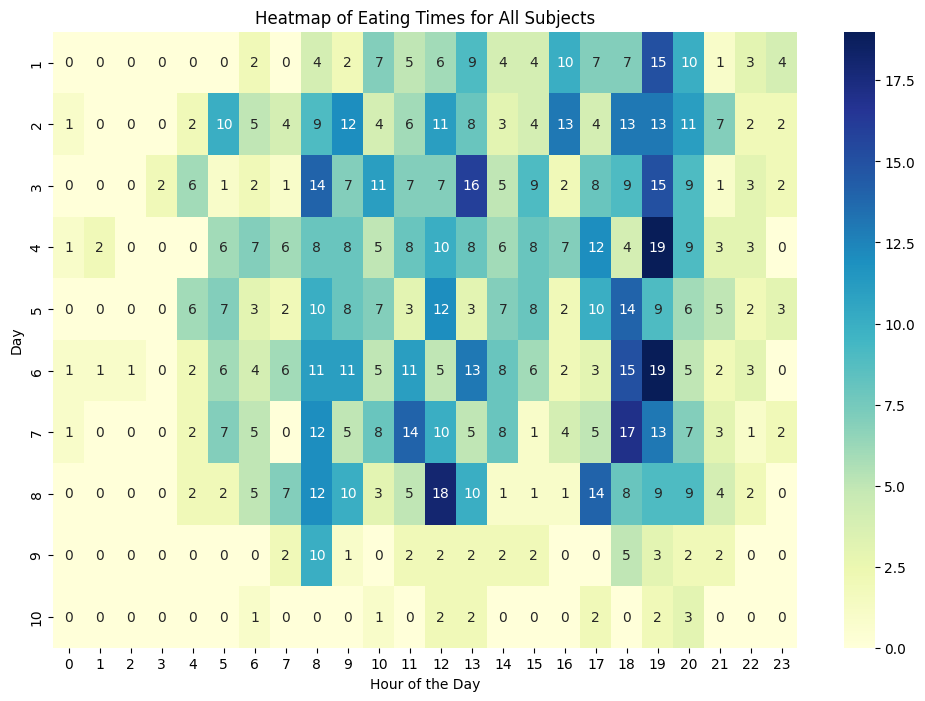

In [4]:
pivot_table = data.pivot_table(index='day', columns='hour', values='logged_food', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Eating Times for All Subjects')
plt.xlabel('Hour of the Day')
plt.ylabel('Day')
plt.show()

In [5]:
food_counts = data.groupby(['hour', 'simplified_food']).size().reset_index(name='count')
most_popular_food = food_counts.loc[food_counts.groupby('hour')['count'].idxmax()]

print(most_popular_food) # I think people are addicted to coffee and sugar lol

     hour     simplified_food  count
0       0               candy      1
5       1            smoothie      2
6       2           snack bar      1
7       3              cheese      1
15      4                milk      7
20      5                milk     12
34      6  standard breakfast      9
40      7              coffee     10
49      8              coffee     31
65      9              coffee     16
81     10              coffee     10
101    11              cheese      7
142    12               salad     13
172    13               salad      7
183    14              coffee      7
207    15              cheese      8
227    16              cheese      5
251    17               candy      7
303    18                soda      7
311    19               candy     11
345    20            desserts      7
372    21            desserts      6
386    22              cheese      6
395    23               chips      5


In [ ]:
food_counts = data.groupby(['time_of_day', 'simplified_food']).size().reset_index(name='count')
most_popular_food = food_counts.loc[food_counts.groupby('time_of_day')['count'].idxmax()]

print(most_popular_food) # cheese and coffee interesting

       time_of_day simplified_food  count
9        Afternoon          cheese     19
46   Early Morning          coffee     56
65      Late Night          cheese      8
90         Morning          coffee     33
129          Night        desserts     21
190           Noon           salad     20
